In [1]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import csv

In [2]:
urls = ['https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=']*3

In [3]:
urls

['https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=',
 'https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=',
 'https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=']

In [4]:
#list of urls
page = 1
while (page<=2):
    url_pos = page
    urls[url_pos] = urls[url_pos] + '&page=' + str(page + 1)
    page = page + 1

In [5]:
urls

['https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=',
 'https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=&page=2',
 'https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=&page=3']

In [6]:
#obtaining data
reviews=[]
for url in urls:
    client = uReq(url)
    page_html = client.read()
    client.close()
    page_soup = soup(page_html, "html.parser")
    reviews = reviews + [review.text for review in page_soup.find_all("div", {"data-qa": "review-quote"})]

In [7]:
len(reviews)

57

In [8]:
reviews

["\r\n                    It's weird, but becomes increasingly hypnotising as the story progresses. And inevitably, there are plenty of loose ends left over to set up series 2.\r\n                ",
 '\r\n                    The Squid Game is a wonderfully crafted suspenseful show that keeps you on the edge of your seat. But as the episodes move forward, the over dramatic elements take center stage and the whole thing loses steam scene after scene.\r\n                ',
 '\r\n                    The originality of the idea, the visual effects and of course, the acting are outstanding and incomparable to anything we have ever seen on television in our lives!\r\n                ',
 "\r\n                    Netflix's breakout series depicts a world of violent and macabre individualism and desperation.\r\n                ",
 "\r\n                    Squid Game is many things, but above all it's top-notch junk TV, to be binged with swivel-eyed abandon.\r\n                ",
 '\r\n          

In [9]:
#csv with reviews
with open('rotten_reviews.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(reviews)

After running the code above once, run from this point

In [1]:
import csv
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
with open('rotten_reviews.csv', 'r') as f:
  reader = csv.reader(f)
  reviews = list(reader)[0]

In [3]:
len(reviews)

57

In [4]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in reviews:   
    word_tokens = word_tokens + word_tokenize(review) 
  
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [5]:
print(word_tokens[:10]) 
print(filtered_word_reviews[:10])

['It', "'s", 'weird', ',', 'but', 'becomes', 'increasingly', 'hypnotising', 'as', 'the']
['It', "'s", 'weird', ',', 'becomes', 'increasingly', 'hypnotising', 'story', 'progresses', '.']


In [6]:
len(filtered_word_reviews)

1132

In [7]:
def maskWordCloud(words, filename):
    text = ''
    
    for w in words:
        text = text +' ' + w
        
    mask = np.array(Image.open("Square-Mask-Edit.png"))
    
    image_colors = ImageColorGenerator(mask)
    
    wc = WordCloud(background_color="white",
                   width=1000, height=1000, max_words=350, 
                   mask=mask, max_font_size=300, min_font_size=10,
                   contour_width=3, contour_color="black").generate(text)
    
    fig, axes = plt.subplots(1,2 , figsize=(12,12))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    
    for ax in axes:
        ax.set_axis_off()
        
    plt.savefig(filename+".png", format="png", dpi=300)
    plt.imshow(wc)

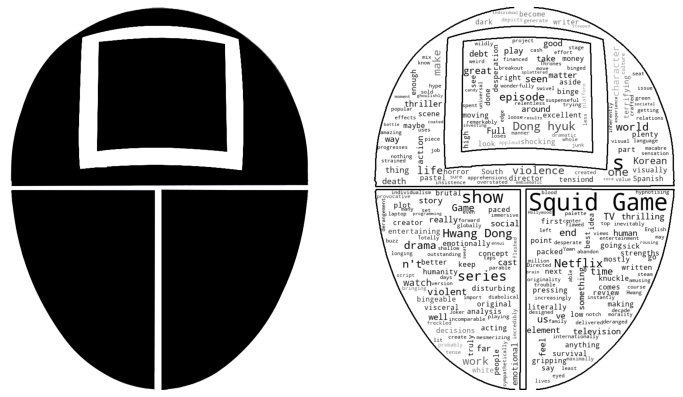

In [8]:
maskWordCloud(filtered_word_reviews, "wc-squidgame")

In [9]:
# adjetivos
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]

In [10]:
len(adjs)

182

In [11]:
adjs[:15]

['weird',
 'hypnotising',
 'loose',
 'set',
 'suspenseful',
 'edge',
 'dramatic',
 'whole',
 'steam',
 'visual',
 'outstanding',
 'incomparable',
 'many',
 'top-notch',
 'swivel-eyed']

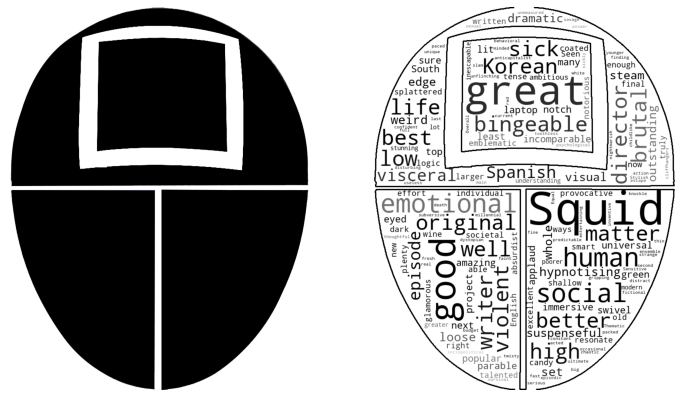

In [12]:
maskWordCloud(adjs, "wc-adjs-squidgame")

In [13]:
from googletrans import Translator

In [23]:
# adjs-pt
translator = Translator()
translations = translator.translate(adjs[:100], dest='pt')
adjs_pt = []

for translation in translations:
    adjs_pt.append(translation.text)

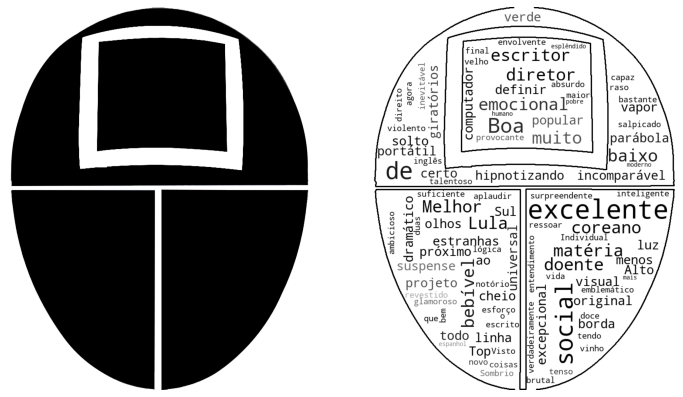

In [24]:
maskWordCloud(adjs_pt, "wc-adjs-pt-squidgame")

In [16]:
# adjs-es
translator = Translator()
translations = translator.translate(adjs[:100], dest='es')
adjs_es = []

for translation in translations:
    adjs_es.append(translation.text)

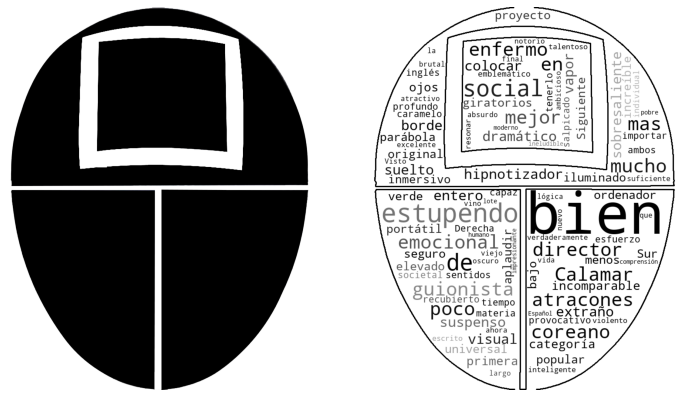

In [17]:
maskWordCloud(adjs_es, "wc-adjs-es-squidgame")

In [14]:
# adjs-fr
translator = Translator()
translations = translator.translate(adjs[:100], dest='fr')
adjs_fr = []

for translation in translations:
    adjs_fr.append(translation.text)

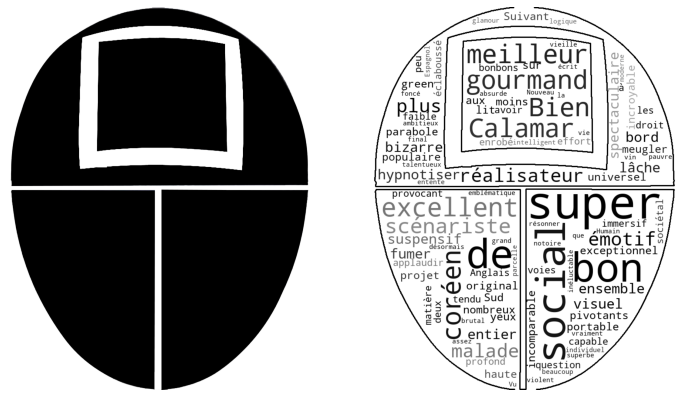

In [15]:
maskWordCloud(adjs_fr, "wc-adjs-fr-squidgame")